In [1]:
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append('../')


from src.network import NeuralNetwork
from src.optimizers import Adam, SGD
from src.trainer import Trainer
from src.utils import (
    split_data, one_hot, fit_minmax, transform_minmax, accuracy,
    plot_curves, confusion_matrix, plot_confusion_matrix, show_predictions,
    plot_regression_predictions)

from data.regression_loader import load_regression_csv

In [11]:
X, y = load_regression_csv()

input = X.shape[1]
output = y.shape[1]

x_min, x_max, denom = fit_minmax(X)
X_scaled = transform_minmax(X, x_min, denom)

(X_train, y_train), (X_val, y_val), (X_test, y_test) = split_data(X_scaled, y, 
                                                            train_ratio=0.7, val_ratio=0.15, 
                                                            test_ratio=0.15, random_seed=10, shuffle=True)

Epoch 001 | loss 99.6064 | score 0.9872 | val_loss 2.4003137295174866 | val_score 0.9864094993891751
Epoch 002 | loss 2.3452 | score 0.9880 | val_loss 2.2979315830070166 | val_score 0.9869891838727396
Epoch 003 | loss 2.3624 | score 0.9883 | val_loss 2.2375745291937514 | val_score 0.9873309236072707
Epoch 004 | loss 2.4224 | score 0.9845 | val_loss 2.8741864199602976 | val_score 0.9837264471657431
Epoch 005 | loss 2.3499 | score 0.9881 | val_loss 2.212282900181342 | val_score 0.9874741240128323
Epoch 006 | loss 2.3542 | score 0.9883 | val_loss 2.2291974553411658 | val_score 0.9873783543351421
Epoch 007 | loss 2.3817 | score 0.9886 | val_loss 2.1612300198505467 | val_score 0.9877631838106361
Epoch 008 | loss 2.6671 | score 0.9885 | val_loss 2.1591032339064204 | val_score 0.9877752256055554
Epoch 009 | loss 2.6177 | score 0.9884 | val_loss 2.2099968264099066 | val_score 0.9874870676904046
Epoch 010 | loss 2.6733 | score 0.9855 | val_loss 2.776165739849654 | val_score 0.9842814371641484
E

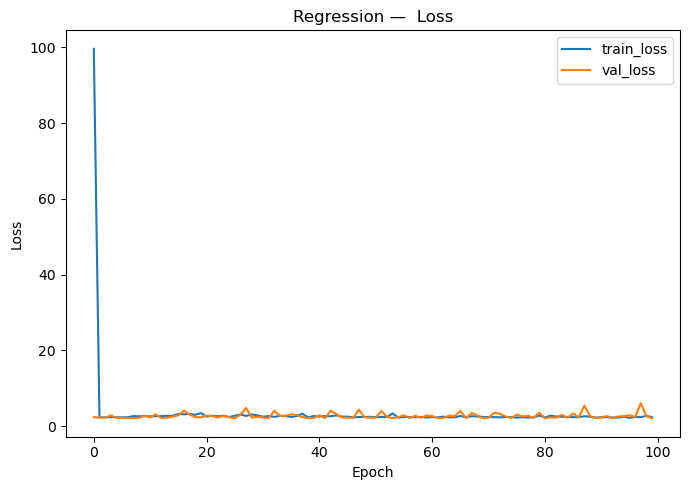

In [12]:
architecture = [input, 32, 16, output]
activations = ['relu', 'relu', 'linear']

optimizer = Adam(lr=0.1, weight_decay=1e-4)

net = NeuralNetwork(architecture, activations)
trainer = Trainer(net, optimizer, loss='mse')

history = trainer.train(
    X_train, y_train,
    X_val=X_val, y_val=y_val,
    epochs=100,
    batch_size=64,
    classification=False,
    verbose=True
)

plot_curves(history, title_prefix='Regression — ')

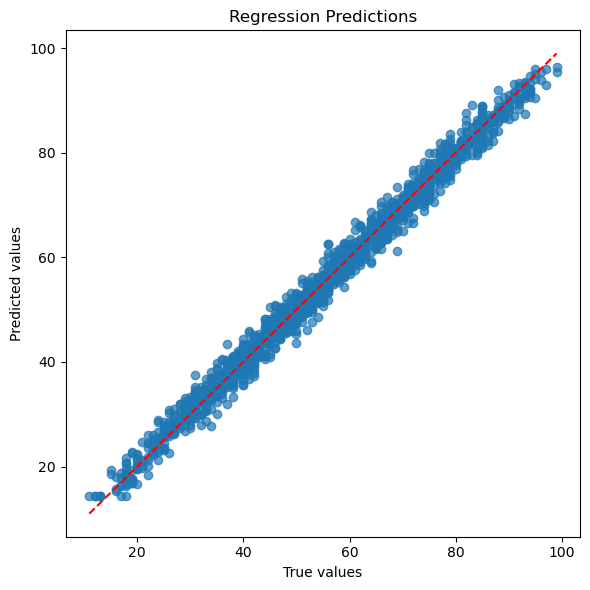

In [13]:
y_pred = trainer.network.forward(X_test, training=False)
plot_regression_predictions(y_test, y_pred)